In [28]:
# Importing Data Manipulation Libraries
import pandas as pd
import numpy as np
# Import Data Visualization Libraries
import seaborn as sns 
import matplotlib.pyplot as plt 
# Import Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')
# Import Logging
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w',
                    filename = 'model.log',force = True)
# Import Scikit Learn Libraries for Machine Learning Model Building
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,learning_curve,KFold
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.cluster import KMeans


# Multicolinearity test and treatment libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA


In [2]:
# Creating Our First Log
logging.info('Import Dataset For Model Building...')

In [3]:
url1 = 'https://raw.githubusercontent.com/mukeshmagar543/Telecom-Churn-Dataset/refs/heads/main/churn-bigml-80.csv'
url2 = 'https://raw.githubusercontent.com/mukeshmagar543/Telecom-Churn-Dataset/refs/heads/main/churn-bigml-20.csv'

df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)

df = pd.concat([df1, df2], axis=0, ignore_index=True)

df.sample(frac= 1)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2830,MT,106,510,No,No,0,169.4,107,28.80,197.2,71,16.76,202.2,79,9.10,10.7,4,2.89,1,False
3195,NJ,182,415,No,No,0,279.1,124,47.45,180.5,108,15.34,217.5,104,9.79,9.5,11,2.57,2,True
139,AZ,94,408,No,Yes,38,170.1,124,28.92,193.3,116,16.43,105.9,73,4.77,12.8,4,3.46,1,False
1841,MN,46,408,No,No,0,156.4,105,26.59,185.5,98,15.77,226.7,96,10.20,11.8,3,3.19,1,False
2338,MN,135,408,No,No,0,155.2,100,26.38,135.9,84,11.55,184.6,82,8.31,3.8,9,1.03,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,VT,94,408,No,No,0,118.7,90,20.18,205.1,57,17.43,172.2,100,7.75,10.4,6,2.81,3,False
3170,MT,101,415,No,No,0,154.4,130,26.25,217.2,101,18.46,185.4,52,8.34,13.9,4,3.75,1,False
639,FL,58,510,No,No,0,234.8,89,39.92,106.8,131,9.08,178.5,122,8.03,9.9,6,2.67,0,False
2708,WY,215,510,No,No,0,83.6,148,14.21,120.9,91,10.28,226.6,110,10.20,10.7,9,2.89,0,False


In [4]:
# Creating Log
logging.info('Dataset Imported Successfully For Model Building...')

In [5]:
# Checking Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [6]:
# Split the Dataset into Numerical_Data and Categorical_Data
Numerical_Data = df.select_dtypes(exclude=['object', 'bool'])

Categorical_Data = df.select_dtypes(include = ['object', 'bool'])

In [7]:
# Checking Numerical_Data
Numerical_Data

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,114,415,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2
3329,106,408,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1
3330,60,415,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3
3331,159,415,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1


In [8]:
# Checking Categorical_Data
Categorical_Data

,State,International plan,Voice mail plan,Churn
0,KS,No,Yes,False
1,OH,No,Yes,False
2,NJ,No,No,False
3,OH,Yes,No,False
4,OK,Yes,No,False
...,...,...,...,...
3328,WI,No,Yes,False
3329,AL,No,Yes,False
3330,VT,No,No,False
3331,WV,No,No,False


In [9]:
from collections import OrderedDict

stats = []

# Descriptive statistics
for col in Numerical_Data:
        numerical_stats = OrderedDict({
            'Feature': col,
            'Minimum': df[col].min(),
            'Maximum': df[col].max(),
            'Mean': df[col].mean(),
            'Mode': df[col].mode()[0] if not df[col].mode().empty else None,
            '25%': df[col].quantile(0.25),
            '75%': df[col].quantile(0.75),
            'IQR': df[col].quantile(0.75) - df[col].quantile(0.25),
            'Standard Deviation': df[col].std(),
            'Skewness': df[col].skew(),
            'Kurtosis': df[col].kurt()
        })
        stats.append(numerical_stats)

# Convert to DataFrame
report = pd.DataFrame(stats)

# Outlier Identification :
outlier_label = []
for col in report['Feature']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR   # LW : Lower Whisker Line
    UW = Q3 + 1.5 * IQR   # UW : Upper Whisker Line
    outliers = df[(df[col] < LW) | (df[col] > UW)]
    if not outliers.empty:
        outlier_label.append("Has Outliers")
    else:
        outlier_label.append("No Outliers")

report["Outlier Comment"] = outlier_label

# Checking Report
report

,Feature,Minimum,Maximum,Mean,Mode,25%,75%,IQR,Standard Deviation,Skewness,Kurtosis,Outlier Comment
0,Account length,1.00,243.00,101.064806,105.00,74.00,127.00,53.00,39.822106,0.096606,-0.107836,Has Outliers
1,Area code,408.00,510.00,437.182418,415.00,408.00,510.00,102.00,42.371290,1.126823,-0.705632,No Outliers
2,Number vmail messages,0.00,51.00,8.099010,0.00,0.00,20.00,20.00,13.688365,1.264824,-0.051129,Has Outliers
3,Total day minutes,0.00,350.80,179.775098,154.00,143.70,216.40,72.70,54.467389,-0.029077,-0.019940,Has Outliers
4,Total day calls,0.00,165.00,100.435644,102.00,87.00,114.00,27.00,20.069084,-0.111787,0.243182,Has Outliers
5,Total day charge,0.00,59.64,30.562307,26.18,24.43,36.79,12.36,9.259435,-0.029083,-0.019812,Has Outliers
6,Total eve minutes,0.00,363.70,200.980348,169.90,166.60,235.30,68.70,50.713844,-0.023877,0.025630,Has Outliers
7,Total eve calls,0.00,170.00,100.114311,105.00,87.00,114.00,27.00,19.922625,-0.055563,0.206156,Has Outliers
8,Total eve charge,0.00,30.91,17.083540,14.25,14.16,20.00,5.84,4.310668,-0.023858,0.025487,Has Outliers
9,Total night minutes,23.20,395.00,200.872037,188.20,167.00,235.30,68.30,50.573847,0.008921,0.085816,Has Outliers


In [10]:
# Checking missing information if any 
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [11]:
# Checking Output  i.e. Target Column for Data Distribution
df['Churn'].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

In [12]:
# Encoding Target Column
df['Churn'] = df['Churn'].astype(int)

In [13]:

df['International plan'] = df['International plan'].replace({'No': 0,'Yes': 1})
df['Voice mail plan'] = df['Voice mail plan'].replace({'No': 0,'Yes': 1})

In [14]:
# Using Label Encoding Technique
from sklearn.preprocessing import LabelEncoder
df['State'] = LabelEncoder().fit_transform(df['State'])
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,48,114,415,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,0
3329,1,106,408,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,0
3330,46,60,415,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,0
3331,49,159,415,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,0


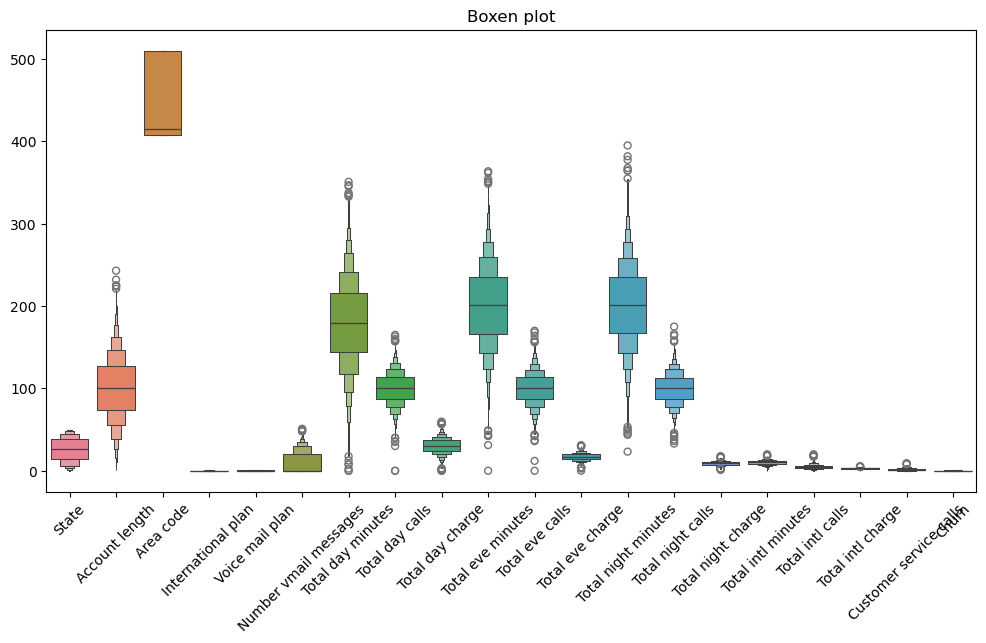

In [15]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=df)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.title('Boxen plot')
plt.show()

In [ ]:
# Creating Our First Log
logging.info('Outlier Detection.')

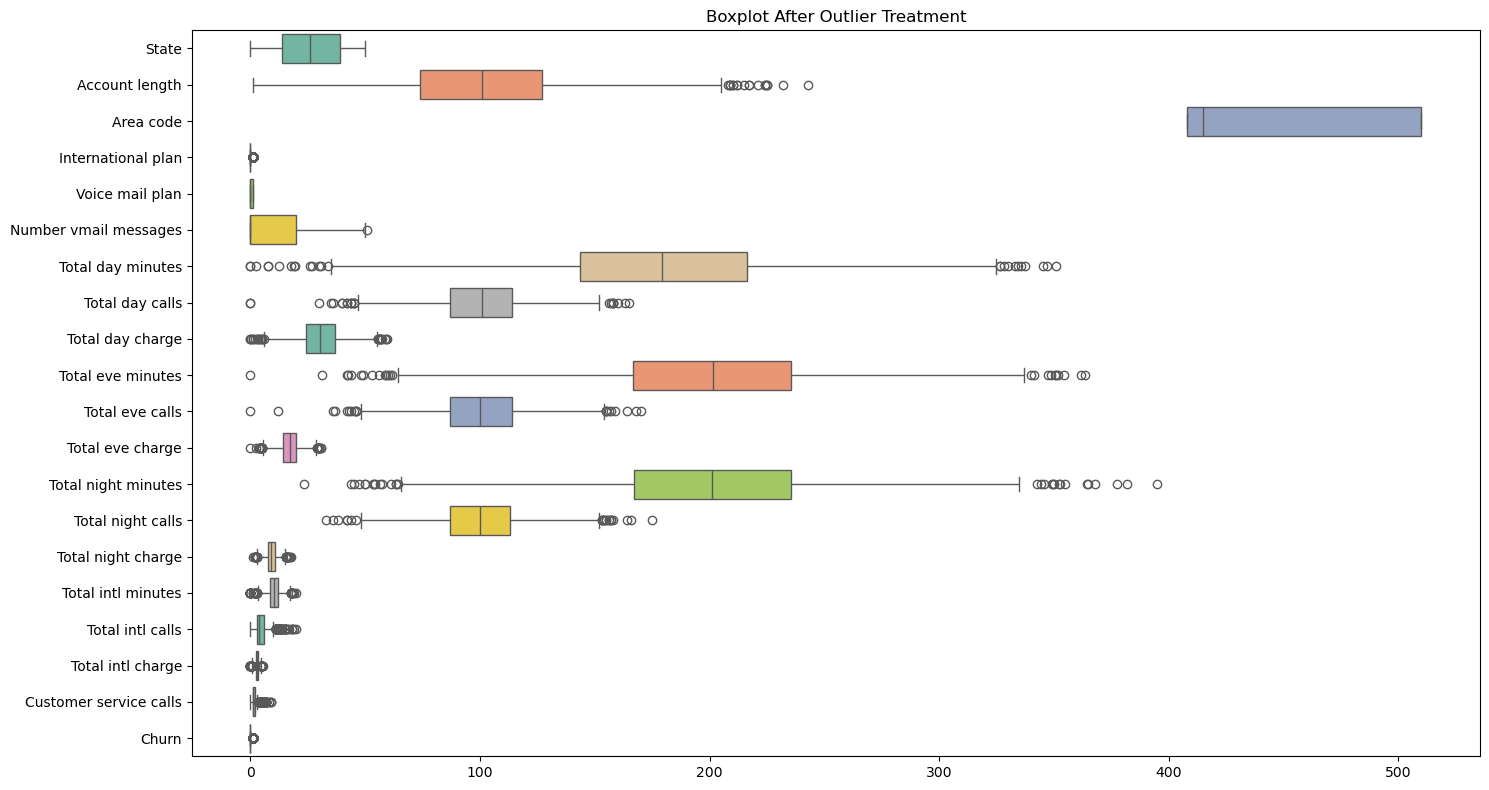

In [16]:
# Set figure size
plt.figure(figsize=(15, 8))

# Create boxplot for all numerical columns
sns.boxplot(data=df, orient='h', palette='Set2')

# Set title
plt.title('Boxplot After Outlier Treatment')
plt.tight_layout()
plt.show()

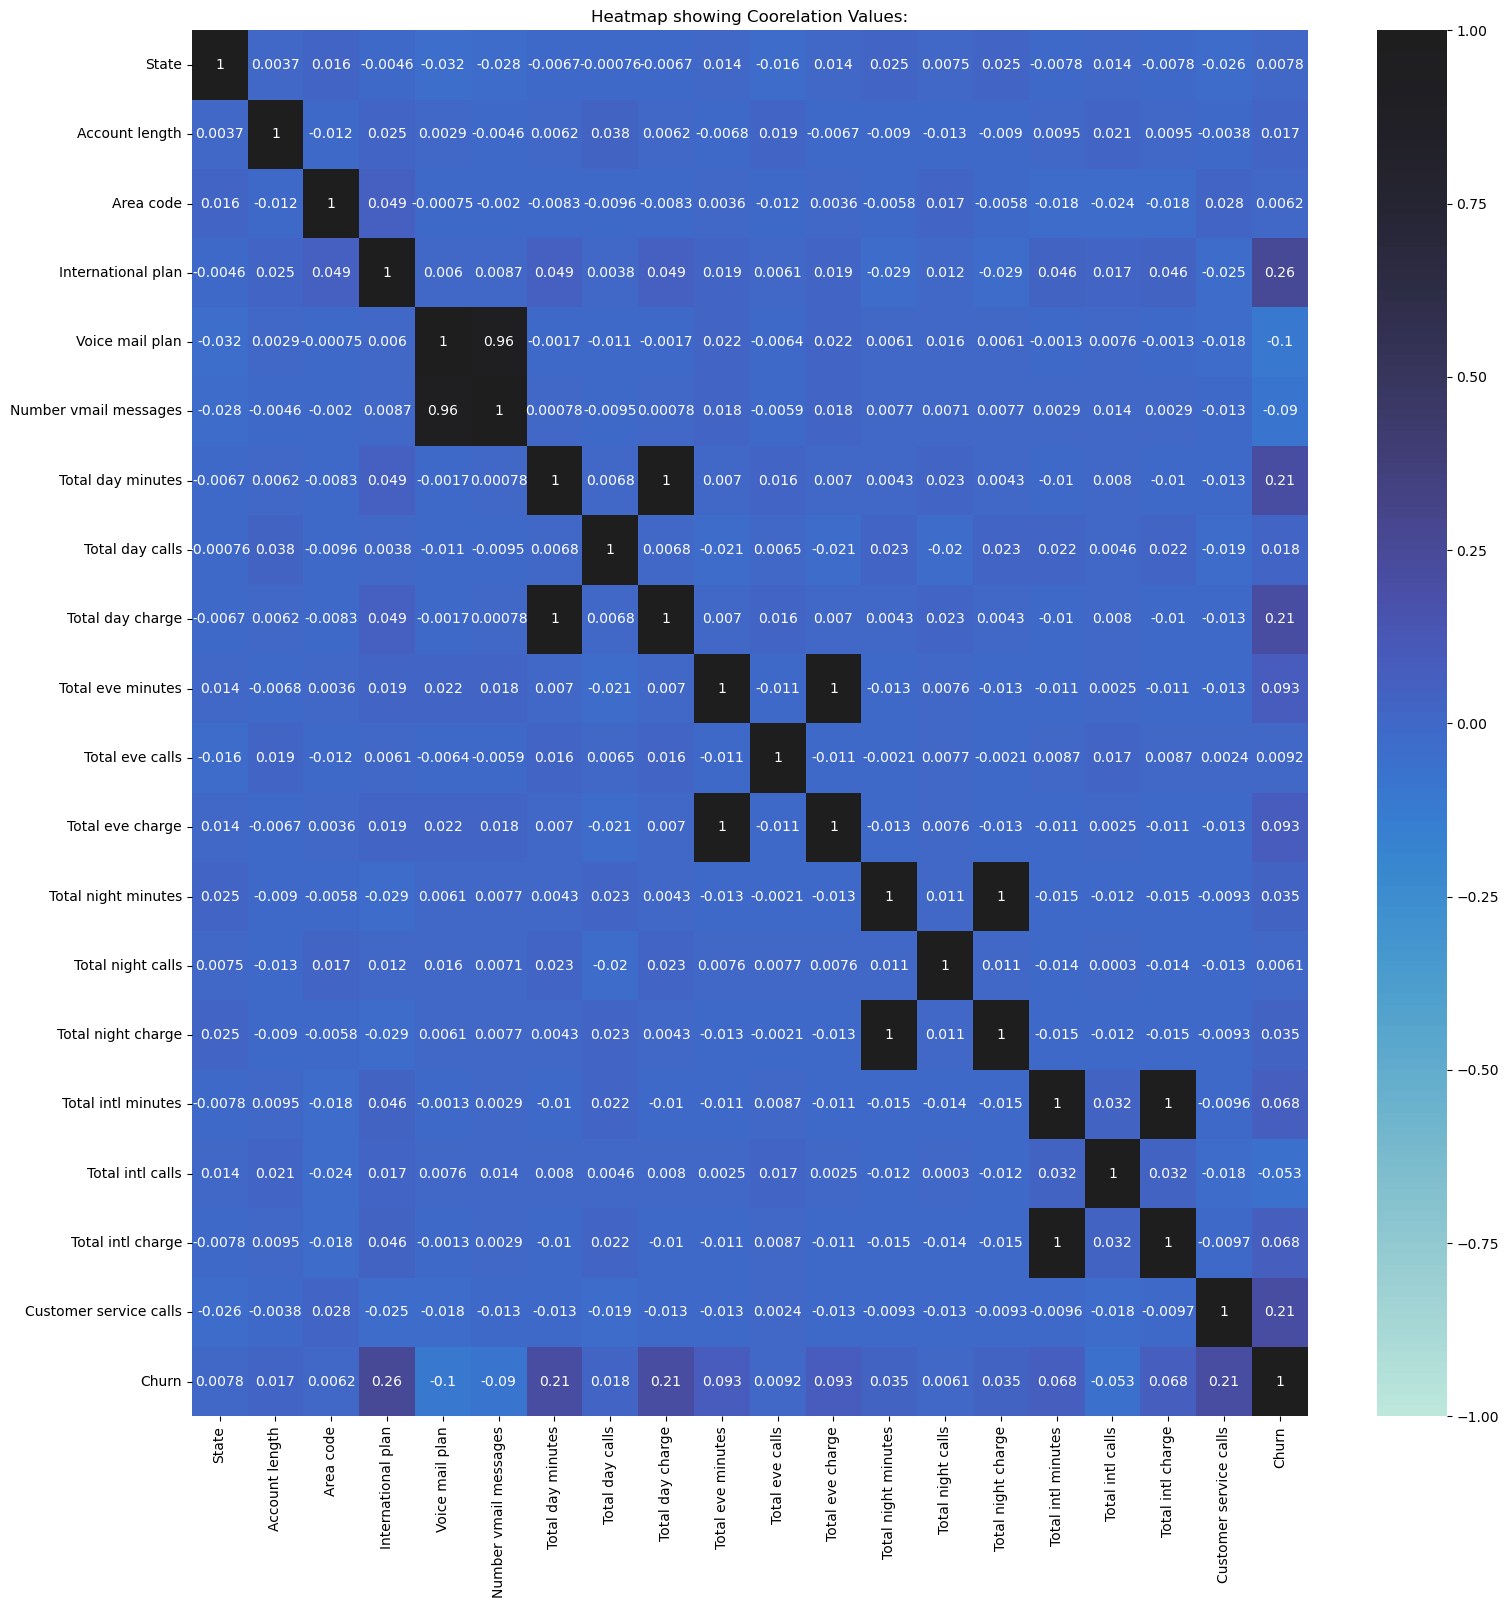

In [18]:
# Checking Correlation 
corr = df.corr()
df.ax = plt.subplots(figsize = (18,18))
sns.heatmap(corr,annot = True,center = True,vmax= 1,vmin = -1)
plt.title('Heatmap showing Coorelation Values:')
plt.show()

In [20]:
# Checking VIF:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    vif['VIF_Values'] = round(vif['VIF_Values'], 2)
    vif = vif.sort_values(by = 'VIF_Values', ascending=False)
    return (vif)

calculate_vif(df.drop('Churn',axis = 1))

,features,VIF_Values
8,Total day charge,1.246309e+08
6,Total day minutes,1.246264e+08
11,Total eve charge,3.743234e+07
9,Total eve minutes,3.743103e+07
12,Total night minutes,1.072038e+07
14,Total night charge,1.072003e+07
17,Total intl charge,9.987617e+05
15,Total intl minutes,9.983928e+05
2,Area code,6.180000e+01
13,Total night calls,2.467000e+01


In [21]:
logging.info('Correlation Matrix plotted and PCA Technique Started....')

In [ ]:
# Step 1 : Divide Dataset into x and y

# X : Independant Column and y : Target Column

X = df.drop(columns = 'Churn')  # Independant Column : 16

y =df['Churn']  # Target Column : 1

# Step 2 : Split the Dataset into Train and Test
# 100% -----> 80% Data is used for Training [Seen Data] and 20% Data [Unseen Data] is used for Testing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 7)

# Step 3 : Normalization Scaling Technique
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# Step 4 : Using SMOTE Technique to Balance Target Column

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train)

In [24]:
logging.info('Model Building Started............')

In [32]:
# Model Building

def train_and_test_split(data, tcol, testSize=0.3, randomState=42):
    X = data.drop(tcol,axis=1)
    y = data[tcol]
    return train_test_split(X,y,test_size = testSize,random_state=randomState)

def model_builder(model_name, model, data, t_col):
    X_train,X_test,y_train,y_test = train_and_test_split(data,t_col)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    result = [model_name, accuracy]
    return result

In [44]:
def multiple_models(data, t_col):
    col_names=['Model Name','accuracy']
    result = pd.DataFrame(columns = col_names)
    result.loc[len(result)] = model_builder('Logistic Regression',LogisticRegression(),data,t_col)
    result.loc[len(result)] = model_builder('Decision Tree',DecisionTreeClassifier(),data,t_col)
    result.loc[len(result)] = model_builder('SVC',SVC(),data,t_col)
    result.loc[len(result)] = model_builder('KNN',KNeighborsClassifier(),data,t_col)
    result.loc[len(result)] = model_builder('Random Forest',RandomForestClassifier(),data,t_col)
    result.loc[len(result)] = model_builder('Gradient Boost',GradientBoostingClassifier(),data,t_col)
    result.loc[len(result)] = model_builder('ADA Boost',AdaBoostClassifier(),data,t_col)
    result.loc[len(result)] = model_builder('XG Boost',XGBClassifier(),data,t_col)
    return result.sort_values(by = 'accuracy', ascending=False)

multiple_models(df, 'Churn')

,Model Name,accuracy
7,XG Boost,0.952
5,Gradient Boost,0.951
4,Random Forest,0.950
1,Decision Tree,0.917
6,ADA Boost,0.885
3,KNN,0.872
0,Logistic Regression,0.859
2,SVC,0.857


In [34]:
def k_fold_cv(X, y , fold= 10):
    score_LR = cross_val_score(LogisticRegression(), X, y ,cv = fold)
    score_DTR = cross_val_score(DecisionTreeClassifier(), X, y, cv = fold)
    score_SVC = cross_val_score(SVC(), X, y ,cv = fold)
    score_KNN = cross_val_score(KNeighborsClassifier(), X, y ,cv = fold)
    score_RF = cross_val_score(RandomForestClassifier(), X, y ,cv = fold)
    score_GB = cross_val_score(GradientBoostingClassifier(), X, y, cv = fold)
    score_ADA = cross_val_score(AdaBoostClassifier(), X, y, cv = fold)
    score_XG = cross_val_score(XGBClassifier(), X, y, cv = fold)
    
    
    
    model_name = ['Logistic Regression','DTR','SVC','KNN','Random Forest','Gradient Boost','ADA Boost','XG' ]
    scores = [score_LR,score_DTR,score_SVC,score_KNN,score_RF,score_GB,score_ADA,score_XG]
    result = []
    for i in range(len(model_name)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_name = model_name[i]
        temp = [m_name,score_mean,score_std]
        result.append(temp)
    k_fold_df = pd.DataFrame(result,columns = ['Model Name','CV Accuracy','CV STD'])
    return k_fold_df.sort_values('CV Accuracy',ascending= False)


k_fold_cv(df.drop('Churn',axis=1), df['Churn'])

,Model Name,CV Accuracy,CV STD
7,XG,0.955002,0.011900
4,Random Forest,0.953204,0.012782
5,Gradient Boost,0.952602,0.008840
1,DTR,0.908802,0.014639
6,ADA Boost,0.876092,0.013642
3,KNN,0.872792,0.012407
0,Logistic Regression,0.855990,0.006748
2,SVC,0.855087,0.001174


In [35]:
# Step 1 : Divide Dataset into x and y

# X : Independant Column and y : Target Column

X = df.drop(columns = 'Churn')  # Independant Column : 16

y =df['Churn']  # Target Column : 1

# Step 2 : Split the Dataset into Train and Test
# 100% -----> 80% Data is used for Training [Seen Data] and 20% Data [Unseen Data] is used for Testing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 7)

# Step 3 : Normalization Scaling Technique
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# Step 4 : Using SMOTE Technique to Balance Target Column

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train)



In [36]:
# Step 5 : Import Model Preprocessing Library from Sklearn
from sklearn.linear_model import LogisticRegression
# Implement Logestic Regression to our Binary Classification Model
# clf = LogisticRegression(random_state=0).fit(X,y)
LR = LogisticRegression()
# Fit the Model on Training Dataset
LR.fit(X_train,y_train)

# Predict the Value Based on Test Dataset
y_pred = LR.predict(X_test)

# Step 6: Use Matrics to evaluate Model Performances
from sklearn.metrics import accuracy_score,classification_report

accuracy_score_LR = accuracy_score(y_test,y_pred)
accuracy_score_LR

0.7796101949025487

In [37]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_pred_DT = DT.predict(X_test)

accuracy_score_DT = accuracy_score(y_pred_DT, y_test)
accuracy_score_DT
# print(f'Accuracy : {round(accuracy_score_DT * 100,2)}%')

0.9010494752623688

In [38]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(X_train,y_train)

y_pred_RF = RF.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score_RF = accuracy_score(y_pred_RF,y_test)
accuracy_score_RF
# print(f'Accuracy : {round(accuracy_score_RF * 100,2)}%')

0.9415292353823088

In [47]:
XGB = XGBClassifier()

XGB.fit(X_train,y_train)

y_pred_XGB = XGB.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score_XGB = accuracy_score(y_pred_XGB,y_test)
accuracy_score_XGB

0.9460269865067467

In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RF, X_train, y_train, cv= 10, scoring= 'accuracy')

print('Accuracy for each fold : ', scores)
print('Average Accuracy across 10 folds : ', np.mean(scores))

Accuracy for each fold :  [0.94273128 0.94273128 0.96696035 0.98237885 0.96696035 0.94493392
 0.97136564 0.96255507 0.97136564 0.96035242]
Average Accuracy across 10 folds :  0.9612334801762115
